# Telco Customer Churn

The aim of the workshop was to build a model to predict the behaviour of a number of clients of a Telco company and know how likely they are to churn.

The data set and details of the excercise are well described in Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn/version/1. 

## Importing and exploring data

We first import the data set and observe the variables. As a first decision, we decide to drop the first column with the customerID which does not seem to be a relevant variable to predict client's churn.

#### Observing variables:

We can see it is a data set with details of **7043 clients (observations)** from a Telco company, which includes **20 different varioables or dimensions**. There are three main different types of variables:

1. **Personal Details**: such as the gender, wether the client is a senior, or wether he/she has a partner or dependent people.
2. **Contracted Services**: including details about the services that client has with the company, such as the period he/she has been a client, wether he/she holds a Phone Service, the amount of lines, the type of Internet service, streaming TV, etc.
3. **Billing information**: details about wether the client has paperless billing, the amount billed - both in total and monthly billed, payment methoid, etc.

Finally, the dimension **'churn'**, indicates wether the client did finally abandon the company or not, if he/she churned.

In [6]:
churn = read.csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=",", dec=".")
churn$customerID = NULL
summary(churn)

    gender     SeniorCitizen    Partner    Dependents     tenure     
 Female:3488   Min.   :0.0000   No :3641   No :4933   Min.   : 0.00  
 Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110   1st Qu.: 9.00  
               Median :0.0000                         Median :29.00  
               Mean   :0.1621                         Mean   :32.37  
               3rd Qu.:0.0000                         3rd Qu.:55.00  
               Max.   :1.0000                         Max.   :72.00  
                                                                     
 PhoneService          MultipleLines     InternetService
 No : 682     No              :3390   DSL        :2421  
 Yes:6361     No phone service: 682   Fiber optic:3096  
              Yes             :2971   No         :1526  
                                                        
                                                        
                                                        
                                         

## Classification: Decision Tree

We apply a **C5.0 model** to the data set and plot the resulting decision tree. As we can see, when we keep all the dimensions, the tree gets messy and no result can be extracted. Therefore, we **consult the summary of the model - summary(model)**; in order to see which dimensions do explain better the model and then be able to take those which have higher significance.

According to the summary bellow, the dimensions we will consider for the decision tree will be:

* 100.00%: Contract
* 55.02%: tenure
* 55.02%: InternetService
* 21.07%: OnlineSecurity
* 15.50%: PaymentMethod
* 10.55%: SeniorCitizen

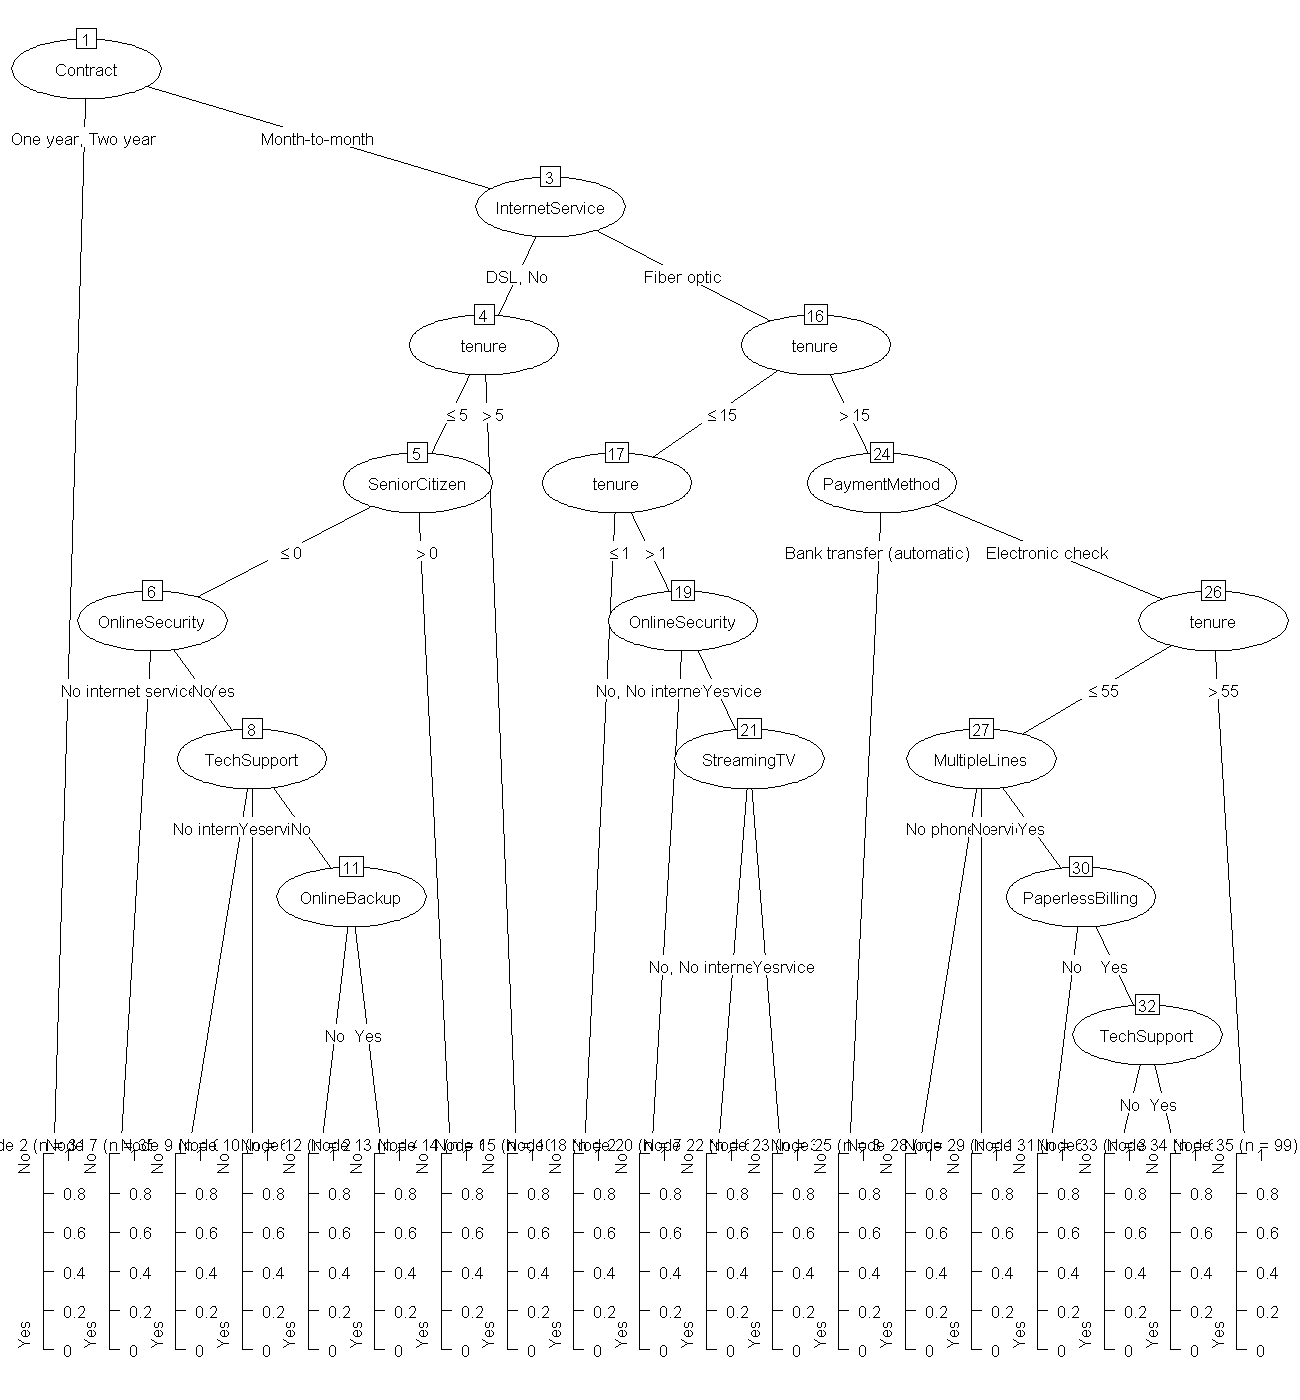

In [32]:
library(C50)
model = C5.0(Churn~., data=churn)
library(repr)
options(repr.plot.width=13, repr.plot.height=14)
plot(model)

In [12]:
summary(model)


Call:
C5.0.formula(formula = Churn ~ ., data = churn)


C5.0 [Release 2.07 GPL Edition]  	Tue Apr 07 17:17:07 2020
-------------------------------

Class specified by attribute `outcome'

Read 7043 cases (20 attributes) from undefined.data

Decision tree:

Contract in {One year,Two year}: No (3168/214)
Contract = Month-to-month:
:...InternetService in {DSL,No}:
    :...tenure > 5: No (1004/183)
    :   tenure <= 5:
    :   :...SeniorCitizen > 0: Yes (60/18)
    :       SeniorCitizen <= 0:
    :       :...OnlineSecurity in {No internet service,Yes}: No (351/99)
    :           OnlineSecurity = No:
    :           :...TechSupport = No internet service: Yes (0)
    :               TechSupport = Yes: No (66/23)
    :               TechSupport = No:
    :               :...OnlineBackup in {No,
    :                   :                No internet service}: Yes (221/93)
    :                   OnlineBackup = Yes: No (45/18)
    InternetService = Fiber optic:
    :...tenure <= 15:
        :..

### Building and explaining the Telco Churn Decision Tree:

When fitting the model with those dimensions which explained the model in a percentage above 10.00%, we obtain the Decision Tree as shown bellow.

Plotting the model, we can see that most part of the clients appear to be in Node 2, which represents clients with a contract for one or two years, those who do churn less.

On the contrary, there are groups of clients who churn more easily, but not all those groups are equally representative (i.e., have the same amount of clients). For instance, 70% clients in Nodes 11 and 14 do churn, but Node 11 only has 60 clients, while Node 14 has 1036 clients. If 70% of clients in Node 14 churn, that means we would be loosing more than 700 clients.

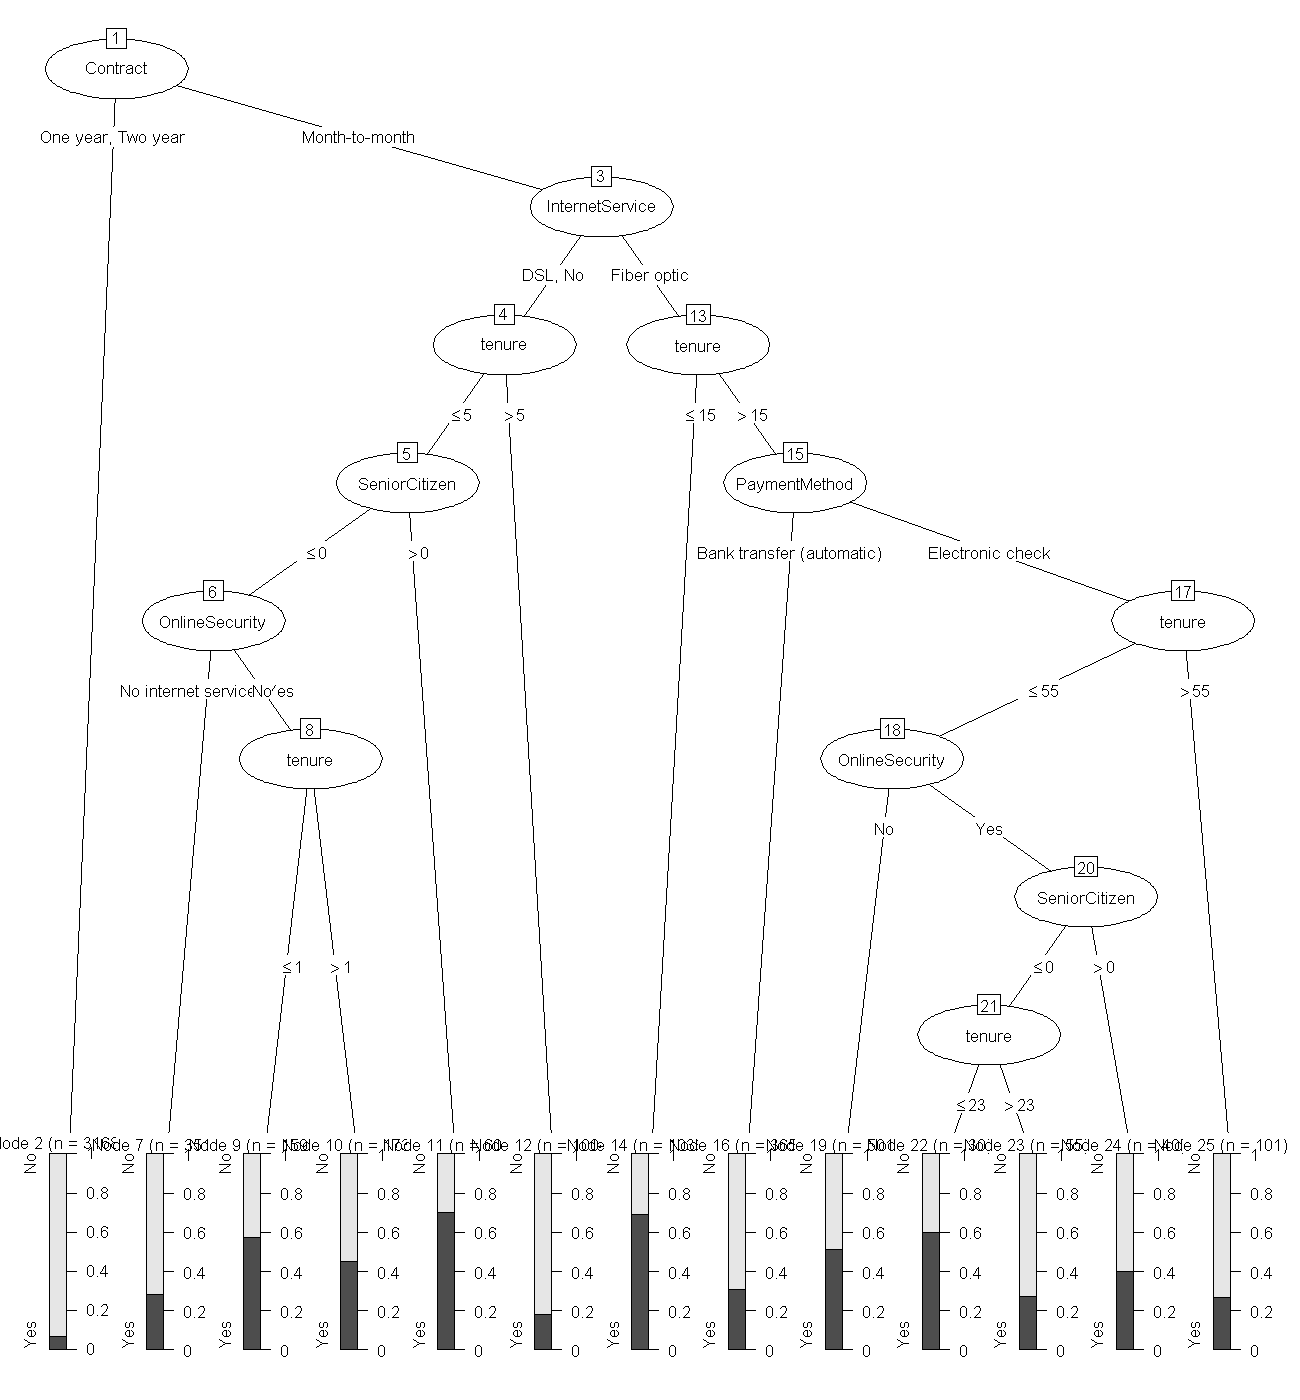

In [31]:
model1 = C5.0(Churn~Contract+tenure+InternetService+OnlineSecurity+PaymentMethod+SeniorCitizen, data = churn)
library(repr)
options(repr.plot.width=13, repr.plot.height=14)
plot(model1)

## Predictive Model with Train and Test sets of data

In order to fit a predictive model, we first need to clean the data ser and get rid of NA values. Then, we will divide our clients data set into two separate sets: one to train the model, the other to test the model.

In [34]:
churnNONA = churn[complete.cases(churn),]
mp_size = floor (0.75 * nrow(churnNONA))
mp_size

[1] 5274

In [35]:
train_ind = sample(seq_len(nrow(churnNONA)), size = mp_size)
train = churnNONA[train_ind,]
test = churnNONA[-train_ind,]

#### First applying C5.0 model

In [36]:
model = C5.0(Churn ~., data = train)
predict(model, newdata = test)

[1] Yes No  No  No  No  No  No  No  Yes No  No  Yes No  No  No  No  No  No 
  [19] No  Yes No  No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No 
  [37] Yes No  No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No 
  [55] Yes No  No  No  No  No  No  Yes No  Yes No  No  No  Yes Yes No  No  No 
  [73] No  No  No  No  No  No  No  No  Yes No  No  Yes Yes No  No  No  Yes No 
  [91] No  No  No  Yes Yes No  Yes No  No  No  No  No  No  Yes No  No  No  No 
 [109] No  No  No  No  No  Yes No  No  No  No  Yes No  Yes No  No  No  Yes No 
 [127] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  Yes No  No 
 [145] No  No  No  No  No  No  No  No  No  Yes No  No  No  No  Yes Yes No  No 
 [163] No  No  No  No  No  No  No  No  No  Yes No  No  No  Yes No  No  No  No 
 [181] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [199] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  Yes
 [217] No  Yes No  Yes No  Yes No  Yes No  No  No  Yes No  No  No  No  No  No 
 [235] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  Yes Yes
 [253] No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No  Yes No 
 [271] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [289] Yes No  No  No  No  Yes No  No  No  No  No  Yes No  No  No  Yes No  No 
 [307] Yes No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No  Yes No 
 [325] No  No  Yes Yes No  No  No  Yes No  No  No  Yes No  Yes No  No  Yes No 
 [343] No  No  No  No  Yes Yes No  No  No  No  No  No  No  No  Yes Yes No  No 
 [361] Yes No  No  No  No  Yes No  No  No  No  No  No  No  No  No  Yes No  No 
 [379] Yes No  No  No  No  Yes No  No  No  No  No  Yes No  No  No  No  No  No 
 [397] No  No  Yes No  No  No  No  No  Yes No  No  No  No  No  No  Yes No  No 
 [415] No  No  Yes No  No  No  No  No  No  No  Yes No  No  No  No  No  Yes No 
 [433] No  No  Yes Yes No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [451] No  No  Yes No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No 
 [469] Yes No  No  No  No  No  No  No  No  No  No  No  No  No  No  Yes Yes No 
 [487] No  No  Yes No  Yes No  No  No  Yes No  No  No  No  No  No  No  Yes No 
 [505] No  No  No  No  No  No  No  No  No  Yes No  Yes Yes No  No  No  Yes No 
 [523] No  No  No  No  Yes No  Yes No  No  No  No  No  No  No  No  Yes Yes No 
 [541] No  No  No  No  No  Yes No  No  Yes Yes No  No  No  No  No  No  No  No 
 [559] No  No  No  No  No  No  No  Yes No  No  No  Yes Yes No  No  No  No  No 
 [577] Yes No  No  No  No  No  No  No  No  No  No  Yes Yes No  No  No  No  Yes
 [595] Yes No  Yes No  No  No  No  No  Yes No  No  Yes No  Yes No  No  No  No 
 [613] No  Yes No  No  Yes No  No  No  No  No  No  No  No  No  No  Yes No  No 
 [631] No  No  No  No  No  No  Yes No  No  No  No  No  No  No  No  No  No  Yes
 [649] No  No  No  No  No  No  No  Yes Yes No  Yes No  No  No  No  No  No  No 
 [667] No  Yes No  No  No  No  Yes No  No  No  No  No  No  Yes No  No  No  Yes
 [685] Yes No  No  No  No  No  No  No  Yes No  No  No  No  No  No  No  No  No 
 [703] No  No  Yes Yes No  No  No  Yes No  Yes Yes Yes No  No  No  No  No  Yes
 [721] No  No  No  No  Yes No  Yes No  No  No  No  No  No  No  No  Yes No  No 
 [739] No  No  No  No  No  No  No  Yes No  No  No  No  No  No  No  Yes No  No 
 [757] No  No  No  No  No  Yes No  No  No  No  Yes No  No  Yes No  No  No  Yes
 [775] No  No  No  No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No 
 [793] No  No  No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No 
 [811] No  No  No  Yes No  No  No  No  Yes No  No  No  Yes No  No  Yes Yes No 
 [829] No  No  No  No  Yes No  No  No  No  No  Yes No  No  No  No  No  No  No 
 [847] No  No  No  No  No  Yes No  No  No  No  No  No  No  No  No  No  Yes No 
 [865] No  No  No  No  Yes No  No  Yes No  No  Yes No  No  No  Yes No  No  No 
 [883] No  Yes No  No  No  No  No  Yes No  No  No  Yes No  No  No  No  No  No 
 [901] Yes No  No  Yes No  Yes No  No  No  No  Yes No

#### Now, applying Random Forest

In [44]:
library(randomForest)
modelRF = randomForest(Churn ~., data = train)
predict(modelRF, newdata = test)

6   10   11   13   17   20   36   38   40   48   49   52   53   58   67   68 
 Yes   No   No   No   No  Yes   No   No  Yes  Yes   No  Yes   No   No   No   No 
  76   79   84   92   94   95   96  102  104  108  109  120  126  128  131  132 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No  Yes   No 
 133  135  137  138  140  146  149  153  155  160  161  167  169  178  185  186 
  No   No   No   No  Yes   No   No   No   No   No   No  Yes   No   No  Yes  Yes 
 187  195  200  201  205  209  211  212  219  220  221  229  230  236  257  261 
  No   No   No   No   No   No  Yes  Yes   No  Yes  Yes   No   No   No   No  Yes 
 267  271  272  276  277  280  282  283  285  287  290  301  320  321  328  332 
  No   No   No  Yes   No   No   No   No   No   No   No   No   No   No  Yes   No 
 334  339  344  346  347  350  352  362  366  369  370  374  382  389  391  392 
 Yes   No   No  Yes  Yes   No   No   No  Yes   No   No   No   No   No  Yes   No 
 393  400  403  404  406  413  419  420  422  442  446  448  451  452  461  465 
 Yes   No  Yes   No   No  Yes   No  Yes   No   No   No   No   No   No   No   No 
 468  472  474  477  480  485  487  491  492  494  499  505  507  519  522  523 
  No   No   No   No   No  Yes  Yes   No   No   No  Yes   No  Yes   No   No   No 
 530  531  538  542  550  551  555  560  565  571  576  577  581  583  584  588 
  No   No   No   No   No   No   No   No   No   No   No   No   No  Yes   No   No 
 589  592  604  608  612  616  635  653  657  661  662  664  671  677  681  688 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No  Yes  Yes 
 689  697  704  706  717  719  720  721  737  742  747  756  764  767  769  778 
  No   No   No   No   No   No   No   No   No  Yes   No  Yes   No   No   No  Yes 
 781  785  787  793  799  811  812  818  819  820  822  825  831  832  836  847 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No   No   No 
 848  851  852  854  857  859  860  867  872  873  878  880  886  889  891  894 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No   No   No 
 897  905  917  923  924  939  940  946  954  955  961  965  967  972  973  977 
  No   No   No  Yes   No   No   No  Yes   No  Yes   No  Yes   No   No   No  Yes 
 980  989  993 1001 1003 1006 1007 1010 1015 1021 1024 1025 1026 1030 1031 1032 
  No   No   No  Yes   No   No   No   No   No   No  Yes   No   No  Yes   No   No 
1036 1039 1051 1058 1060 1061 1063 1068 1076 1079 1082 1084 1085 1088 1090 1092 
  No   No   No   No  Yes   No   No   No   No   No  Yes  Yes   No   No  Yes   No 
1101 1110 1123 1124 1128 1130 1131 1132 1140 1142 1144 1146 1149 1153 1157 1159 
  No   No   No   No   No   No   No   No   No   No   No   No  Yes   No   No   No 
1161 1163 1165 1169 1170 1174 1183 1187 1191 1192 1200 1201 1202 1203 1212 1213 
 Yes   No   No   No   No   No   No   No   No   No  Yes   No   No   No   No   No 
1215 1218 1231 1234 1242 1249 1256 1260 1262 1282 1284 1286 1287 1291 1303 1309 
  No   No   No   No   No  Yes  Yes   No   No   No   No   No   No   No   No  Yes 
1310 1317 1326 1337 1343 1345 1346 1348 1350 1352 1354 1362 1363 1366 1368 1371 
 Yes   No  Yes   No   No   No   No   No   No   No   No  Yes  Yes   No   No   No 
1375 1377 1384 1387 1394 1396 1398 1402 1407 1415 1416 1422 1426 1432 1433 1435 
  No   No  Yes   No   No   No  Yes  Yes   No   No   No  Yes   No   No   No  Yes 
1436 1437 1441 1442 1447 1449 1450 1455 1459 1463 1466 1473 1482 1484 1487 1489 
  No  Yes   No   No  Yes   No   No   No   No   No  Yes  Yes   No   No   No   No 
1498 1500 1504 1509 1513 1514 1516 1518 1520 1532 1534 1535 1538 1539 1544 1546 
  No   No   No   No  Yes  Yes   No   No  Yes   No   No   No   No  Yes   No   No 
1553 1558 1561 1564 1566 1567 1571 1573 1575 1578 1580 1584 1588 1604 1607 1608 
  No   No   No   No   No   No   No  Yes   No   No   No   No   No   No   No   No 
1613 1619 1625 1626 1627 1629 1630 1635 1636 1638 1640 1641 1644 1645 1646 1650 
  No   No   No  Yes   No  Yes   No

### Confusion Matrix

We will now show the Confusion Matrix for both models in order to see where both models' predictions were right of wrong.

According to these Confusion Matrix, it seems that both models have a very similar Error percentage, i.e. when the model either predicts the client will churn and finally doesn't, or predicts the client will not churn and finally does so:

* C5.0: 20.81%
* RF: 19.68%

In [41]:
table(predict(model, newdata = test), test$Churn)

     
        No  Yes
  No  1169  271
  Yes   95  223

In [42]:
table(predict(modelRF, newdata = test), test$Churn)

     
        No  Yes
  No  1163  245
  Yes  101  249